# Assignment : Clustering and PCA

## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

## Business Goal

The goal is to categorize the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to list out the countries which the CEO needs to focus on the most.

#### Below are the steps which we will be basically following:

1. [Step 1: Reading and Understanding the Data](#1)
1.  [Step 2: Data Cleansing](#2)
1. [Step 3: Data Visualization](#3)
1. [Step 4: Data Preparation](#4) 
1. [Step 5: PCA Application](#5)
1. [Step 6: Hopkins Statistics Test](#6)
1. [Step 7: Model Building](#7)
1. [Step 8: Final Analysis using Hierarchical Clustering](#8)
1. [Step 9: Final Analysis using K-Means Clustering](#9)
1. [Step 10: Closing Statement](#10)

<a id="1"></a> <br>
## Step 1: Reading and Understanding the Data

In [1]:
# import all libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [2]:
# Reading the data dictionary file

df_structure = pd.read_csv('data-dictionary+.csv')
df_structure.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [3]:
# Reading the country file on which analysis needs to be done

df_country = pd.read_csv('Country-data.csv')

df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [4]:
df_country.shape

(167, 10)

In [5]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


In [6]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<a id="2"></a> <br>
## Step 2 : Data Cleansing

We will need to do some basic cleansing check before we start with model building process.

In [7]:
# Calculating the Missing Values % contribution in DF

df_null = df_country.isna().mean()*100
df_null

country      0.0000
child_mort   0.0000
exports      0.0000
health       0.0000
imports      0.0000
income       0.0000
inflation    0.0000
life_expec   0.0000
total_fer    0.0000
gdpp         0.0000
dtype: float64

#### Inference:
- None of the columns have null values hence no imputation/drop required.

In [8]:
# Datatype check for the dataframe

df_country.dtypes

country       object 
child_mort    float64
exports       float64
health        float64
imports       float64
income        int64  
inflation     float64
life_expec    float64
total_fer     float64
gdpp          int64  
dtype: object

#### Inference:
- None of the columns seem to have inconsistent datatype from above analysis, hence no conversion is being done.

In [9]:
# Checking for duplicates

df_country.loc[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


#### Checking for outliers:

In [10]:
df_country.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
90%,100.2200,70.8000,10.9400,75.4200,41220.0000,16.6400,80.4000,5.3220,41840.0000
95%,116.0000,80.5700,11.5700,81.1400,48290.0000,20.8700,81.4000,5.8610,48610.0000
99%,153.4000,160.4800,13.4740,146.0800,84374.0000,41.4780,82.3700,6.5636,79088.0000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdb59f11f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdb59f2f6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdb59f11f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdb59f21cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdb59f11dd0>],
 'means': []}

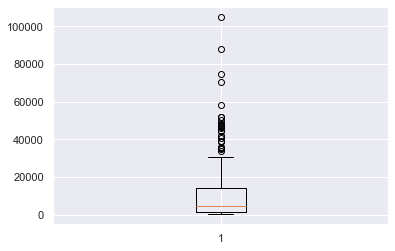

In [11]:
plt.boxplot(df_country.gdpp)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdb48fcafd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdb48fa96d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdb48fcaf90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdb59f40c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdb59f4b650>],
 'means': []}

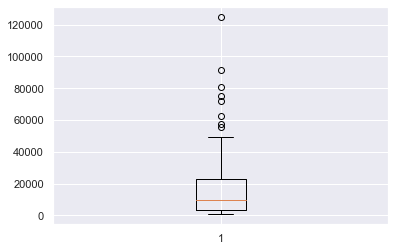

In [12]:
plt.boxplot(df_country.income)

{'whiskers': [<matplotlib.lines.Line2D object at 0x7fdb38e1df10>, <matplotlib.lines.Line2D object at 0x7fdb38e12a50>], 'caps': [<matplotlib.lines.Line2D object at 0x7fdb38e2f610>, <matplotlib.lines.Line2D object at 0x7fdb38e2fb10>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fdb38e1ded0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fdb38e2ab90>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fdb49041590>], 'means': []}


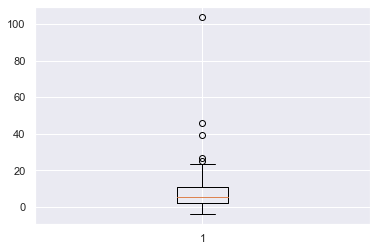

In [13]:
print(plt.boxplot(df_country.inflation))

We see that gdpp, income and inflation column has high outliers. 

In [14]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df_country.select_dtypes(include = ['object']).columns
num_col = df_country.select_dtypes(exclude = ['object']).columns

In [15]:
Q1 = df_country.gdpp.quantile(0.05)
Q3 = df_country.gdpp.quantile(0.95)
#IQR = Q3-Q1
print(df_country[(df_country.gdpp <= Q3)])

                 country  child_mort  exports  health  imports  income  \
0    Afghanistan         90.2000     10.0000  7.5800  44.9000   1610     
1    Albania             16.6000     28.0000  6.5500  48.6000   9930     
2    Algeria             27.3000     38.4000  4.1700  31.4000   12900    
3    Angola              119.0000    62.3000  2.8500  42.9000   5900     
4    Antigua and Barbuda 10.3000     45.5000  6.0300  58.9000   19100    
..                   ...     ...         ...     ...      ...     ...    
162  Vanuatu             29.2000     46.6000  5.2500  52.7000   2950     
163  Venezuela           17.1000     28.5000  4.9100  17.6000   16500    
164  Vietnam             23.3000     72.0000  6.8400  80.2000   4490     
165  Yemen               56.3000     30.0000  5.1800  34.4000   4480     
166  Zambia              83.1000     37.0000  5.8900  30.9000   3280     

     inflation  life_expec  total_fer   gdpp  
0   9.4400     56.2000     5.8200      553    
1   4.4900     76

The dataset seems to be almost clean and hence no such cleansing activities are required.

<a id="3"></a> <br>
## Step 3 : Data Visualization

(9.5, -0.5)

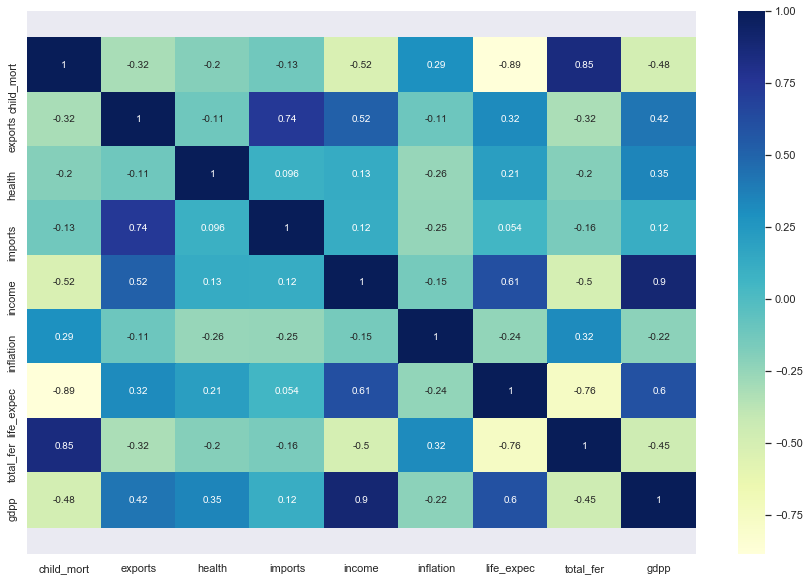

In [16]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))        
ax = sns.heatmap(df_country.corr(),annot = True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Inference:
- `child_mortality` and `life_expentency` have high negative correlation
- `child_mortality` and `total_fertility` have high positive correlation`
- `imports` and `exports` have high positive correlation.
- `life_expentency` and `total_fertility` have high negative correlation.

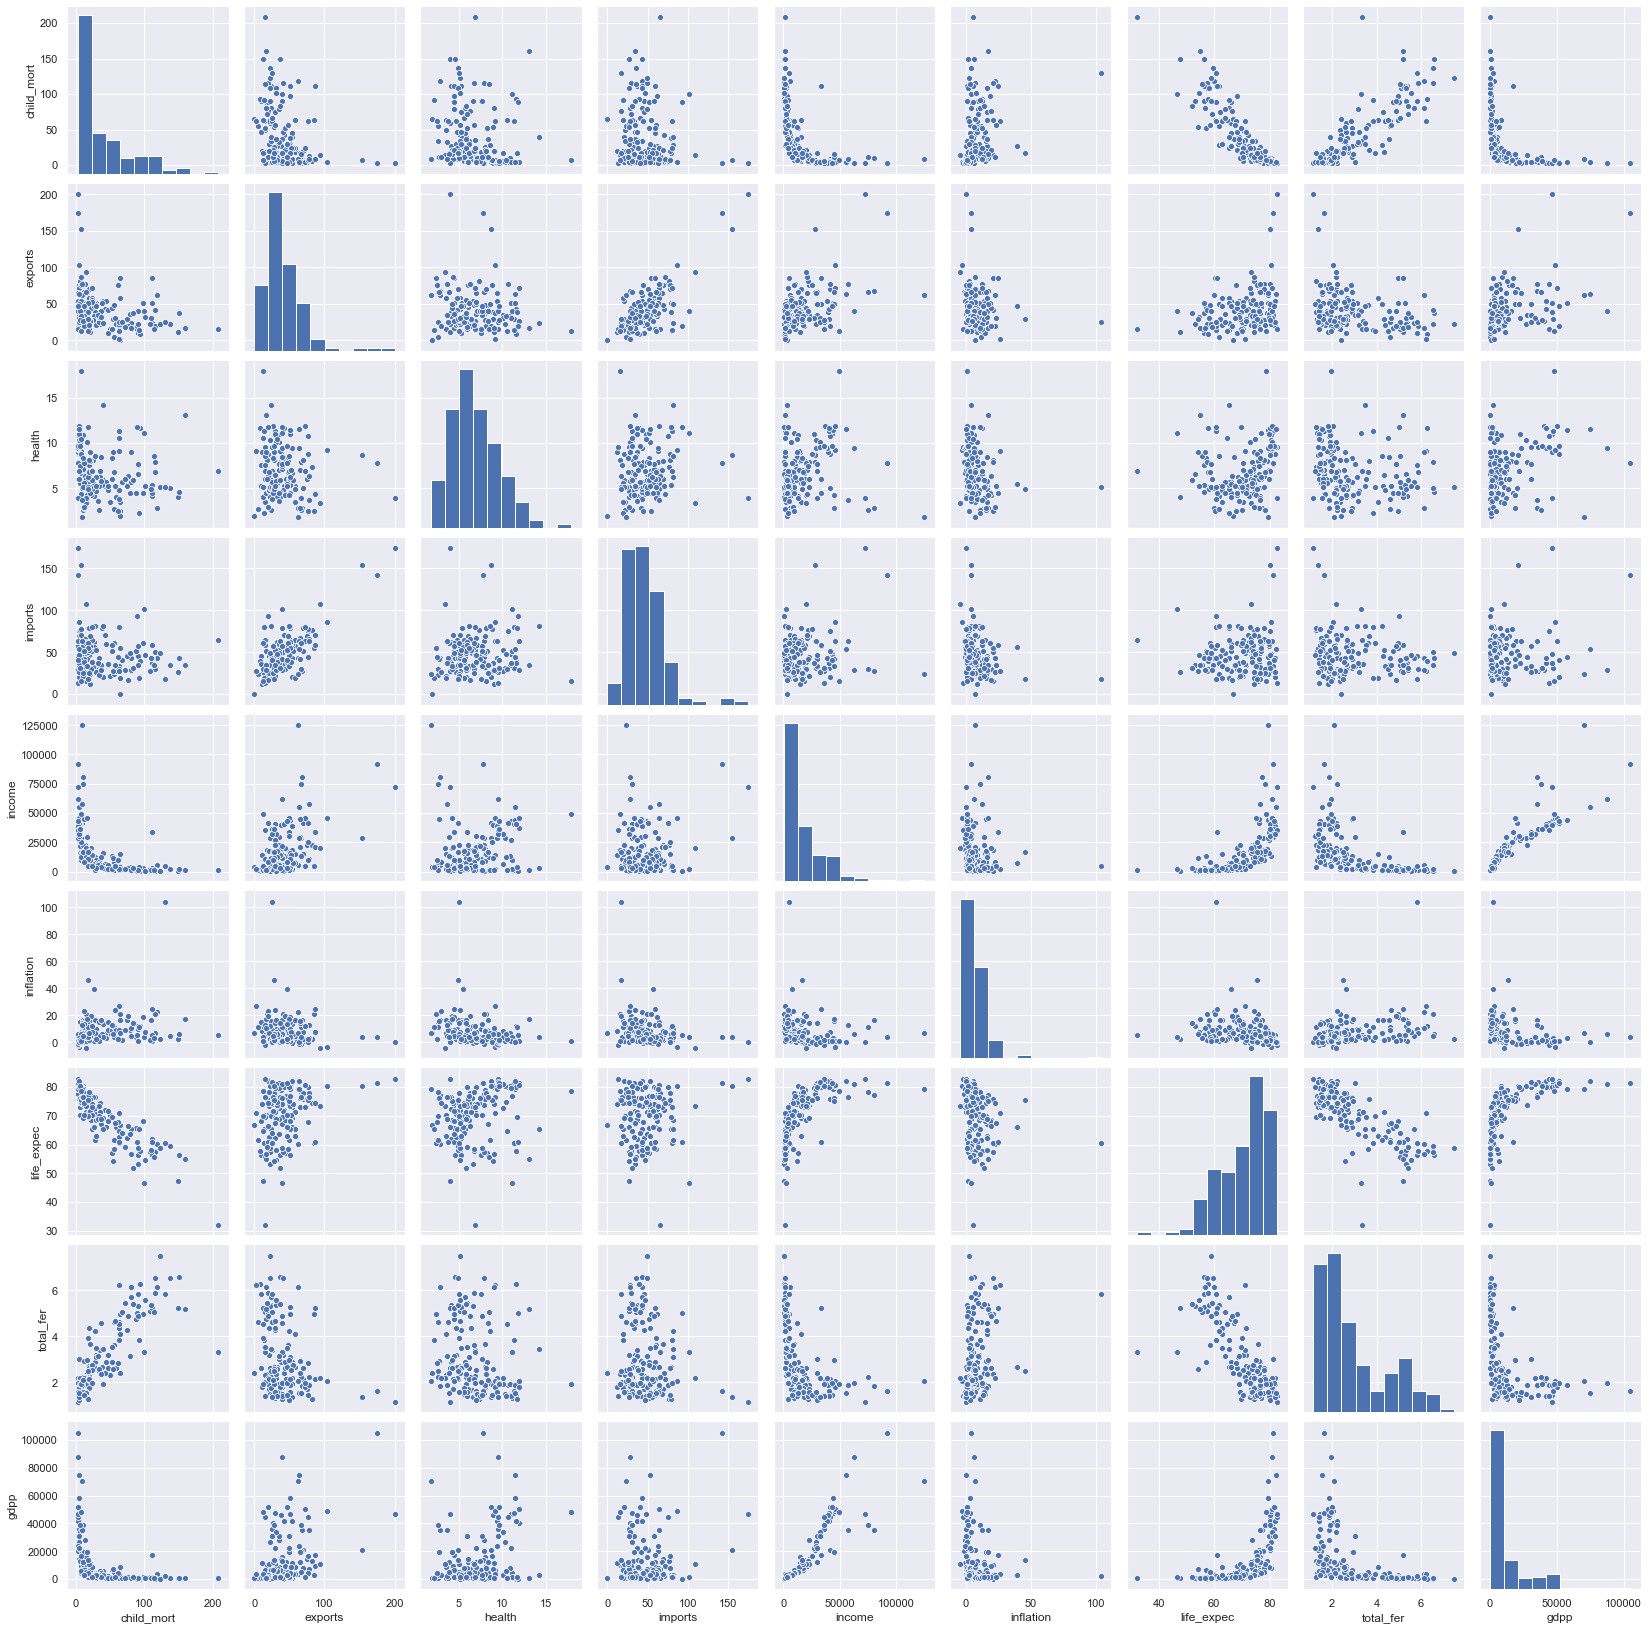

In [17]:
# Pairplot of all numeric columns

sns.pairplot(df_country)

<a id="4"></a> <br>
## Step 4 : Data Preparation

In [18]:
# Converting exports,imports and health spending percentages to absolute values.

df_country['exports'] = df_country['exports'] * df_country['gdpp']/100
df_country['imports'] = df_country['imports'] * df_country['gdpp']/100
df_country['health'] = df_country['health'] * df_country['gdpp']/100

In [19]:
df_country.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


In [20]:
# Dropping country column as final df will only contain data columns

df_country_drop = df_country.copy()
country = df_country_drop.pop('country')

In [21]:
df_country_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


#### Rescaling the Features
It is important to do standardisation/normalisation of data.
There are two common ways of rescaling:

1. Min-Max scaling<br>
2. Standardization (mean-0, sigma-1)

Here, we will use Standardization Scaling.

In [22]:
# Standarization technique for scaling

warnings.filterwarnings("ignore")
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country_drop)

In [23]:
df_country_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])


## Step 5 : PCA Application

We will be doing PCA because we want to remove the redundancies in the data and find the most important directions where the data was aligned. 

Principal component analysis (PCA) is one of the most commonly used `dimensionality reduction` techniques in the industry. By converting large data sets into smaller ones containing fewer variables, it helps in improving model performance and visualizing complex data sets.

We will use PCA for dimensionality reduction as from the heatmap it seems evident that correlation exists between the attributes.

In [24]:
pca = PCA(svd_solver='randomized', random_state=42)

In [25]:
# PCA on the scaled data

pca.fit(df_country_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [26]:
# PCA components created 

pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [27]:
# Variance Ratio

pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

Text(0, 0.5, 'Variance Ratio')

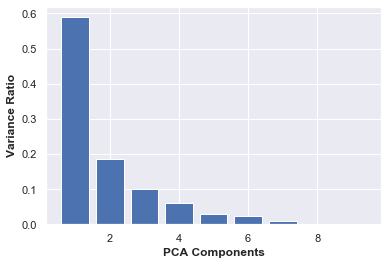

In [28]:
# Variance Ratio bar plot for each PCA components.

ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

#### Inference:
- With first component variance explained is close to 60%.
- For second component variance explained is almost 20%.

Text(0, 0.5, 'Cumulative Explained Variance')

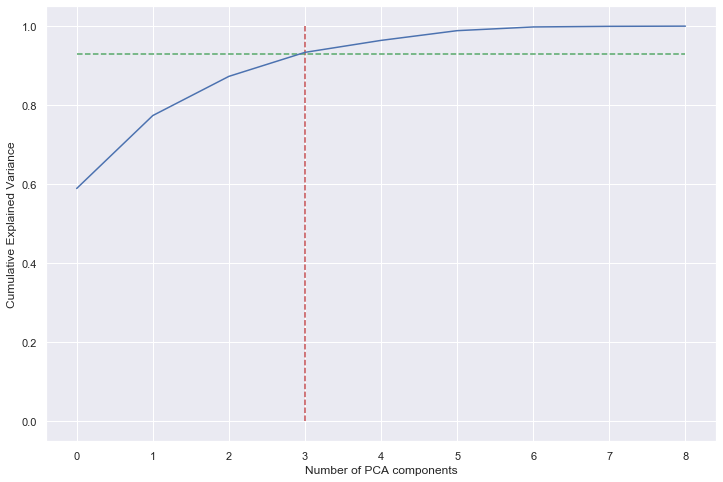

In [29]:
# Scree plot to visualize the cumulative variance against the number of components

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

#### Inference:
It is evident from the above Scree plot that more than 90% variance is explained by the first 3 principal components.
Hence, we will be using these components going forward for Clustering process.

In [30]:
# Checking which attributes are well explained by the pca components

org_col = list(df_country.drop(['country'],axis=1).columns)
attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})

In [31]:
attributes_pca

,Attribute,PC_1,PC_2,PC_3
0,child_mort,-0.3164,0.4763,-0.1500
1,exports,0.3429,0.3973,-0.0306
2,health,0.3585,0.1551,-0.0757
3,imports,0.3449,0.3708,-0.0722
4,income,0.3800,0.1284,0.1458
5,inflation,-0.1431,0.2213,0.9484
6,life_expec,0.3439,-0.3698,0.1968
7,total_fer,-0.3028,0.4597,-0.0778
8,gdpp,0.4000,0.2006,0.0103


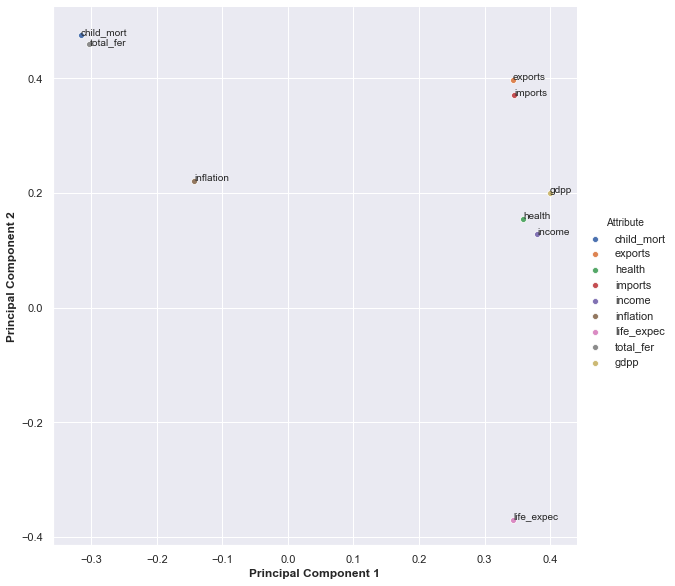

In [32]:
# Plotting the above dataframe for better visualization with PC1 and PC2

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

#### Inference:
- `life expectency`, `income`, `gdpp` and `health` are very well explained by PC1.
- `imports` and `exports` are well explained by both the components PC1 and PC2.
- `child mortality` and `total fertility` are well explained by PC2.
- `inflation` is neither explained by PC1 nor with PC2

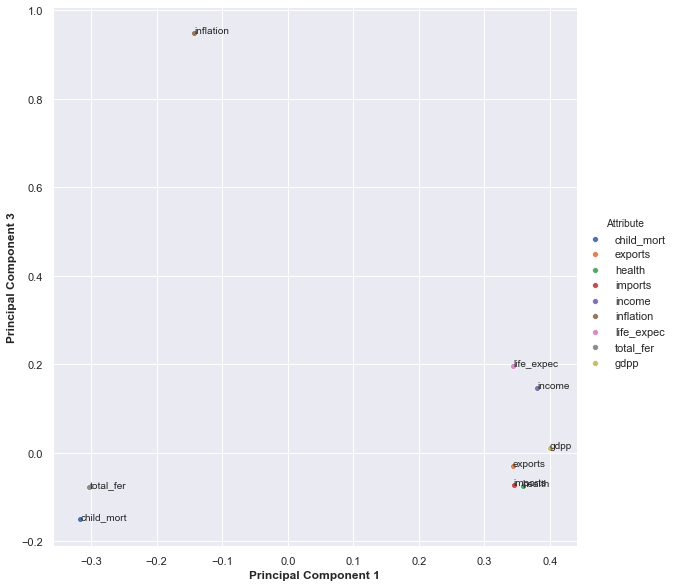

In [33]:
# Plotting the above dataframe with PC1 and PC3 to understand the components which explains inflation.

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_3[i]))

#### Inference:
- `inflation` is well explained by PC3.

Since 90% variance is explained by 3 principal components, lets build the dataframe using those 3 components only.

In [34]:
# Building the dataframe using Incremental PCA for better efficiency.

inc_pca = IncrementalPCA(n_components=3)

In [35]:
# Fitting the scaled df on incremental pca

df_inc_pca = inc_pca.fit_transform(df_country_scaled)
df_inc_pca

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [36]:
# Creating new dataframe with principal components

df_pca = pd.DataFrame(df_inc_pca, columns=["PC_1", "PC_2","PC_3"])
df_pca_final = pd.concat([country, df_pca], axis=1)
df_pca_final.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.6374,1.4690,-0.5414
1,Albania,-0.0223,-1.4319,-0.0207
2,Algeria,-0.4576,-0.6733,0.9619
3,Angola,-2.7245,2.1746,0.6067
4,Antigua and Barbuda,0.6498,-1.0244,-0.2501


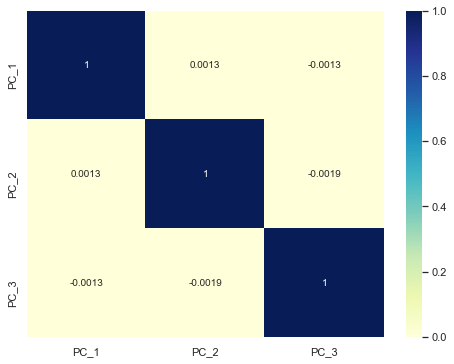

In [37]:
# Plotting heatmap to check is there still any dependency in the dataset.

plt.figure(figsize = (8,6))        
ax = sns.heatmap(df_pca_final.corr(),annot = True, cmap="YlGnBu")
bottom, top = ax.get_ylim()


#### Inference:
As we can see from above heatmap that the correlation among the attributes is almost `0`, we can proceed with this dataframe.

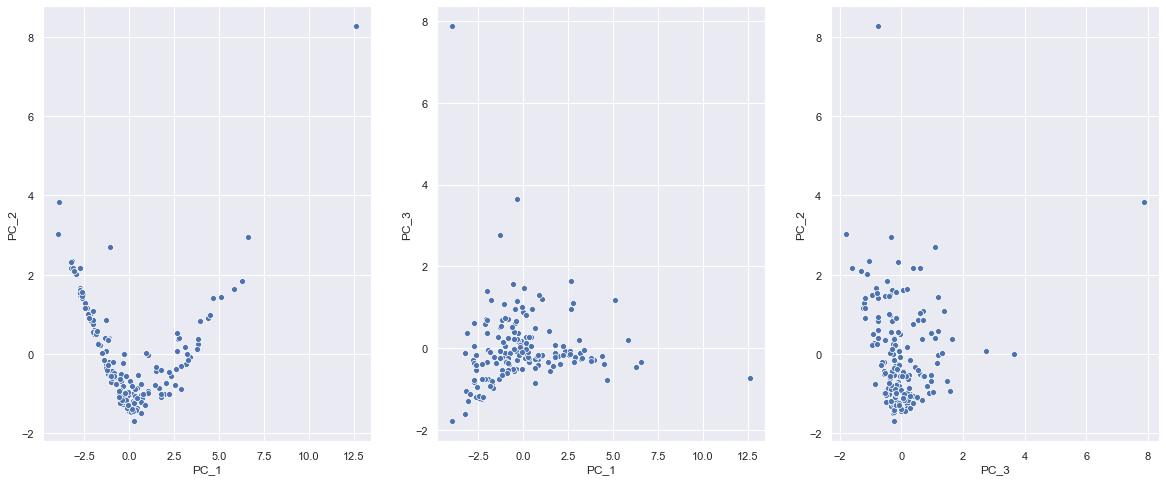

In [38]:
# Scatter Plot to visualize the spread of data across PCA components

plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_2')
plt.subplot(1,3,2)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_3')
plt.subplot(1,3,3)
sns.scatterplot(data=df_pca_final, x='PC_3', y='PC_2')

#### Outlier Analysis again

There are 2 types of outliers
- Statistical
- Domain specific

Text(0.5, 0, 'PC Components')

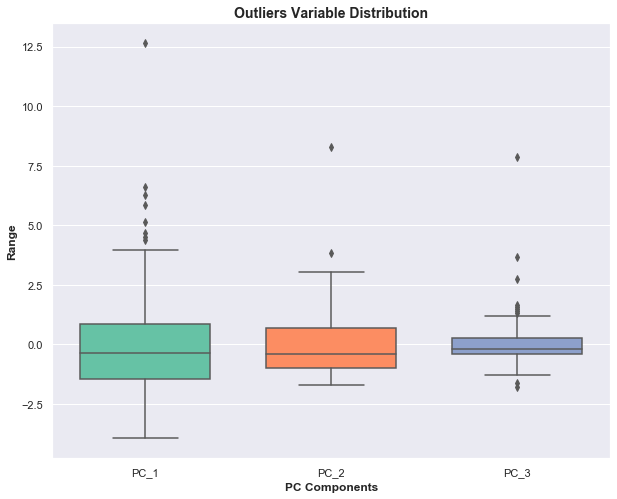

In [39]:
# Outlier Analysis 

outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_pca_final[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

In [40]:
# Statstical Outlier treatment for PC_1

Q1 = df_pca_final.PC_1.quantile(0.05)
Q3 = df_pca_final.PC_1.quantile(0.95)
IQR = Q3 - Q1
print(df_pca_final[(df_pca_final.PC_1 >= Q1) & (df_pca_final.PC_1 <= Q3)])
df_pca_final_outlier_removed = df_pca_final[(df_pca_final.PC_1 >= Q1) & (df_pca_final.PC_1 <= Q3)]
# Statstical Outlier treatment for PC_2

Q1 = df_pca_final.PC_2.quantile(0.05)
Q3 = df_pca_final.PC_2.quantile(0.95)
IQR = Q3 - Q1
print(df_pca_final[(df_pca_final.PC_2 >= Q1) & (df_pca_final.PC_2 <= Q3)])
df_pca_final_outlier_removed = df_pca_final_outlier_removed[(df_pca_final_outlier_removed.PC_2 >= Q1) & (df_pca_final_outlier_removed.PC_2 <= Q3)]
# Statstical Outlier treatment for PC_3

Q1 = df_pca_final.PC_3.quantile(0.05)
Q3 = df_pca_final.PC_3.quantile(0.95)
IQR = Q3 - Q1
print(df_pca_final[(df_pca_final.PC_3 >= Q1) & (df_pca_final.PC_3 <= Q3)])
df_pca_final_outlier_removed = df_pca_final_outlier_removed[(df_pca_final_outlier_removed.PC_3 >= Q1) & (df_pca_final_outlier_removed.PC_3 <= Q3)]

                 country    PC_1    PC_2    PC_3
0    Afghanistan         -2.6374 1.4690  -0.5414
1    Albania             -0.0223 -1.4319 -0.0207
2    Algeria             -0.4576 -0.6733 0.9619 
3    Angola              -2.7245 2.1746  0.6067 
4    Antigua and Barbuda 0.6498  -1.0244 -0.2501
..                   ...    ...      ...     ...
162  Vanuatu             -1.1750 -0.2813 -0.6704
163  Venezuela           -0.3115 -0.0067 3.6567 
164  Vietnam             -0.5924 -1.0782 0.5106 
165  Yemen               -1.8015 0.5908  1.1778 
166  Zambia              -2.6466 1.5681  -0.1740

[149 rows x 4 columns]
                 country    PC_1    PC_2    PC_3
0    Afghanistan         -2.6374 1.4690  -0.5414
2    Algeria             -0.4576 -0.6733 0.9619 
4    Antigua and Barbuda 0.6498  -1.0244 -0.2501
5    Argentina           0.0372  -0.6809 1.4670 
6    Armenia             -0.3327 -1.2745 0.1766 
..       ...                 ...     ...    ... 
162  Vanuatu             -1.1750 -0.2813 -0.6

Text(0.5, 0, 'PC Components')

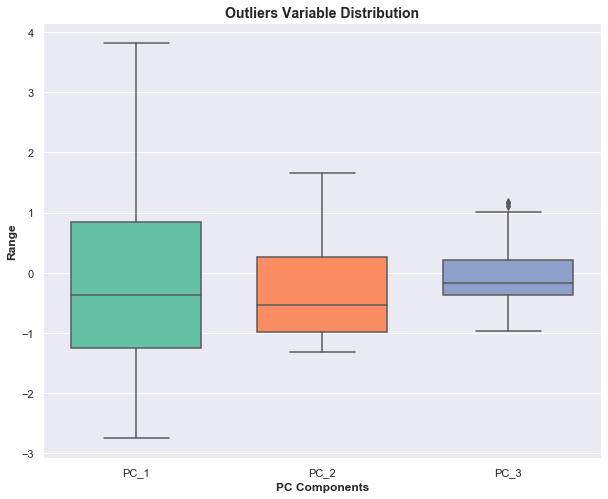

In [41]:
# Plot after Outlier removal 

outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_pca_final_outlier_removed[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

In [42]:

df_pca_final = df_pca_final.reset_index(drop=True)
df_pca_final_data = df_pca_final.drop(['country'],axis=1)
df_pca_final.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.6374,1.4690,-0.5414
1,Albania,-0.0223,-1.4319,-0.0207
2,Algeria,-0.4576,-0.6733,0.9619
3,Angola,-2.7245,2.1746,0.6067
4,Antigua and Barbuda,0.6498,-1.0244,-0.2501


<a id="6"></a> <br>
## Step 6 : Hopkins Statistics Test

The `Hopkins statistic` (introduced by Brian Hopkins and John Gordon Skellam) is a way of `measuring the cluster tendency` of a data set.It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. A value close to `1` tends to indicate the data is `highly clustered`, `random data` will tend to result in values around `0.5`, and uniformly distributed data will tend to result in values close to `0`.

In [43]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [44]:
# Hopkins score

hopkins(df_pca_final_data)

0.9370094462578396

#### Inference:
- Since the value is between 0.7 - 0.99, there is a high chance of clustering to be formed

<a id="7"></a> <br>
## Step 7 : Model Building

### K- means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.


**Finding the Optimal Number of Clusters**

#### Elbow Curve to get the right number of Clusters


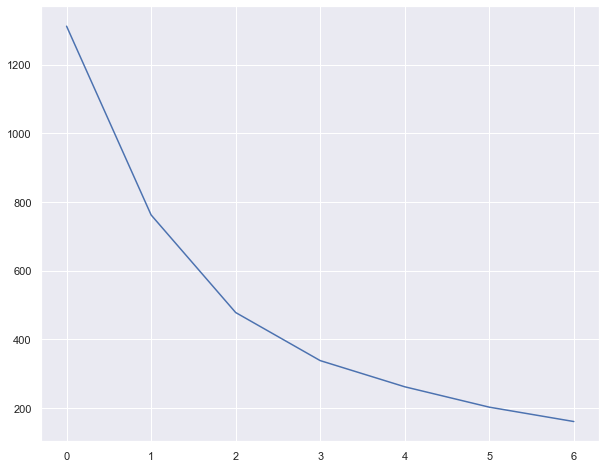

In [45]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50,random_state= 100)
    model_clus.fit(df_pca_final_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

#### Inference:

Looking at the above elbow curve it looks good to proceed with either 4 or 5 clusters.

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [46]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
sse_ = []
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_pca_final_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca_final_data, cluster_labels)
    sse_.append([num_clusters, silhouette_avg])

    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.49093050017646556
For n_clusters=3, the silhouette score is 0.47848617291464945
For n_clusters=4, the silhouette score is 0.48186916213510383
For n_clusters=5, the silhouette score is 0.48797218986928775
For n_clusters=6, the silhouette score is 0.45039645773392495
For n_clusters=7, the silhouette score is 0.4012360843381681
For n_clusters=8, the silhouette score is 0.41316969581024865


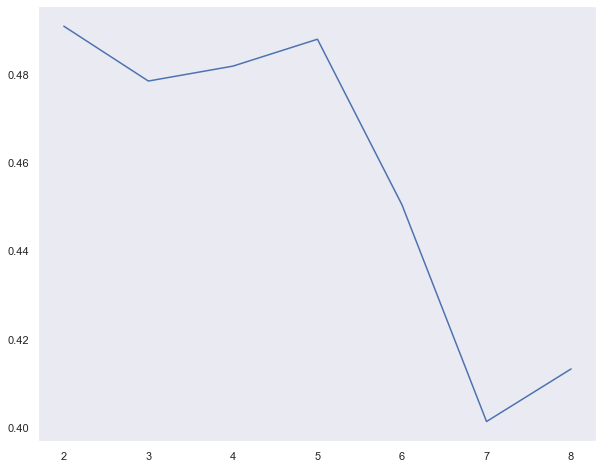

In [47]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.grid()
plt.show()

### Sum of Squared Distances


In [48]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca_final_data)
    ssd.append(model_clus.inertia_)

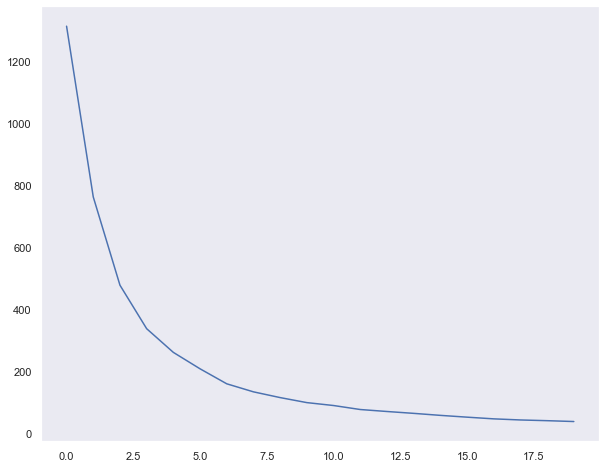

In [49]:

plt.plot(ssd)
plt.grid()
plt.show()


In [50]:
#K-means with k=4 clusters

cluster4 = KMeans(n_clusters=4, max_iter=50, random_state= 100)
cluster4.fit(df_pca_final_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [51]:
# Cluster labels

cluster4.labels_

array([3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3,
       0, 1, 0, 3, 3, 0, 3, 1, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 1, 0,
       1, 0, 0, 0, 0, 3, 3, 0, 0, 1, 1, 3, 3, 0, 1, 3, 1, 0, 0, 3, 3, 0,
       3, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 3, 1, 0, 3, 0, 0, 3,
       3, 0, 0, 2, 0, 3, 3, 0, 0, 3, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       1, 1, 3, 3, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0,
       3, 1, 0, 1, 3, 3, 0, 1, 0, 0, 3, 0, 1, 1, 0, 3, 0, 3, 3, 0, 0, 0,
       0, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3], dtype=int32)

In [52]:
# Assign the label

df_pca_final['Cluster_Id4'] = cluster4.labels_
df_pca_final.head()

,country,PC_1,PC_2,PC_3,Cluster_Id4
0,Afghanistan,-2.6374,1.4690,-0.5414,3
1,Albania,-0.0223,-1.4319,-0.0207,0
2,Algeria,-0.4576,-0.6733,0.9619,0
3,Angola,-2.7245,2.1746,0.6067,3
4,Antigua and Barbuda,0.6498,-1.0244,-0.2501,0


In [53]:
# Number of countries in each cluster

df_pca_final['Cluster_Id4'].value_counts()

0    88
3    48
1    30
2    1 
Name: Cluster_Id4, dtype: int64

#### Inference:
It seems there are good number of countries in each clusters.

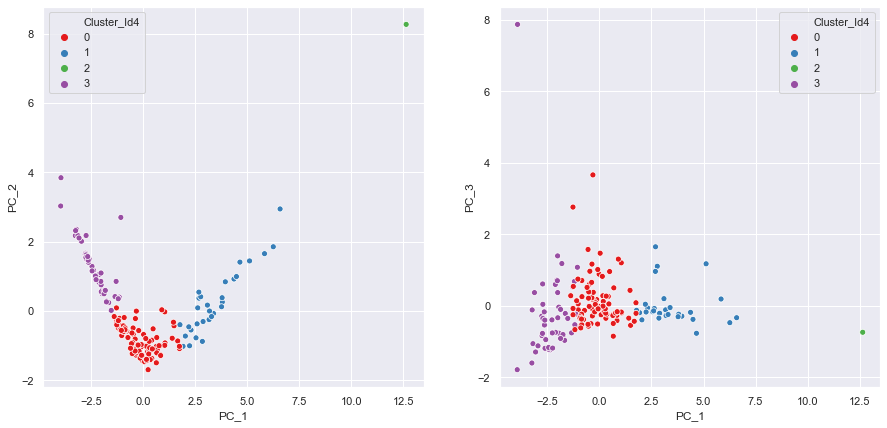

In [54]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,7))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id4',legend='full',palette="Set1",data=df_pca_final,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id4',legend='full',palette="Set1",data=df_pca_final,ax=axes[1])

#### Inference:
- In plot 1, it seems lot of intra-distance between the cluster elements, which is not a good sign.

In [55]:
# Lets drop the Cluster Id created with 4 clusters and proceed with 5 clusters.

df_pca_final = df_pca_final.drop('Cluster_Id4',axis=1)

In [56]:
#K-means with k=5 clusters

cluster5 = KMeans(n_clusters=5, max_iter=50,random_state=100)
cluster5.fit(df_pca_final_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [57]:
# Cluster labels

cluster5.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 4, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [58]:
# assign the label

df_pca_final['Cluster_Id'] = cluster5.labels_
df_pca_final.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.6374,1.4690,-0.5414,2
1,Albania,-0.0223,-1.4319,-0.0207,0
2,Algeria,-0.4576,-0.6733,0.9619,0
3,Angola,-2.7245,2.1746,0.6067,2
4,Antigua and Barbuda,0.6498,-1.0244,-0.2501,0


In [59]:
# Number of countries in each cluster

df_pca_final['Cluster_Id'].value_counts()

0    90
2    47
1    28
4    1 
3    1 
Name: Cluster_Id, dtype: int64

We have visualized the data on the principal components and saw some good clusters were formed but some were not so good hence let's now visualize the data on the original attributes.

In [60]:
# Merging the df with PCA with original df

df_merge = pd.merge(df_country,df_pca_final,on='country')
df_merge_col = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]

# Creating df with mean values
cluster_child = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).child_mort.mean())
cluster_export = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).exports.mean())
cluster_import = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).imports.mean())
cluster_health = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).health.mean())
cluster_income = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).income.mean())
cluster_inflation = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).gdpp.mean())

df_concat = pd.concat([pd.Series([0,1,2,3,4]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
df_concat.columns = ["Cluster_Id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df_concat.head()

,Cluster_Id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,20.5478,3477.0155,3588.1336,528.8943,13804.3333,7.1601,73.3933,2.2424,7808.5778
1,1,5.0607,25013.1036,21018.7643,4114.4289,47928.5714,2.8501,80.4500,1.7586,45200.0000
2,2,90.7936,885.2247,835.9992,114.7514,3870.7021,9.9518,59.2128,4.9740,1900.2553
3,3,2.8000,183750.0000,149100.0000,8158.5000,91700.0000,3.6200,81.3000,1.6300,105000.0000
4,4,130.0000,589.4900,405.4200,118.1310,5150.0000,104.0000,60.5000,5.8400,2330.0000


In [61]:
df_merge_col.head(5)

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,2
1,Albania,16.6000,1145.2000,1987.7400,267.8950,9930,4.4900,76.3000,1.6500,4090,0
2,Algeria,27.3000,1712.6400,1400.4400,185.9820,12900,16.1000,76.5000,2.8900,4460,0
3,Angola,119.0000,2199.1900,1514.3700,100.6050,5900,22.4000,60.1000,6.1600,3530,2
4,Antigua and Barbuda,10.3000,5551.0000,7185.8000,735.6600,19100,1.4400,76.8000,2.1300,12200,0


From the business understanding we have learnt that `Child_Mortality`, `Income`, `Gdpp` are some important factors which decides the development of any country.
We have also cross checked with Principal components and found that these variables have good score in PCA.
Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

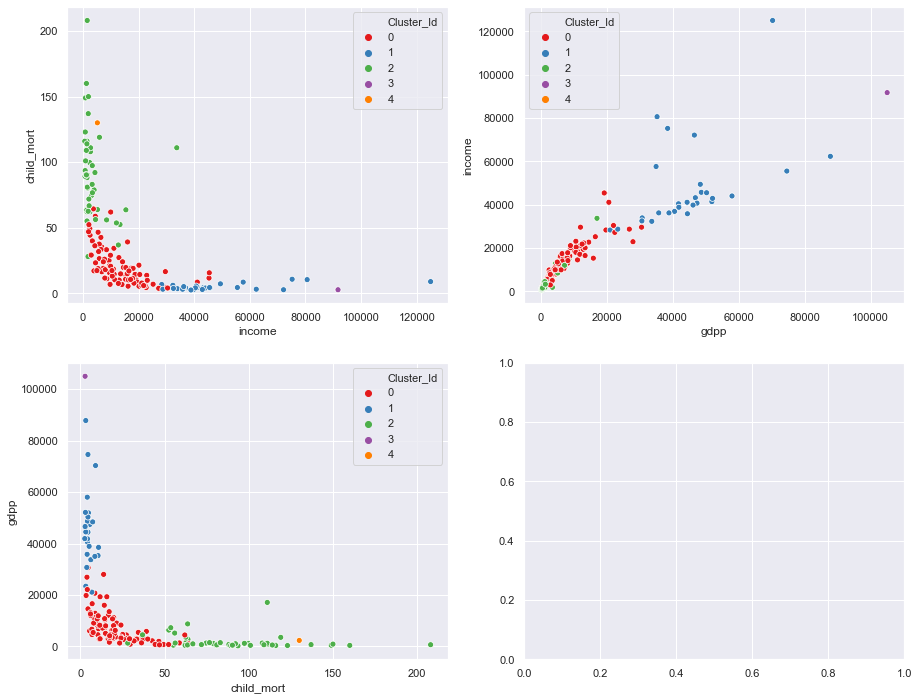

In [62]:
# Scatter plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col,legend='full',palette="Set1",ax=axes[1][0])

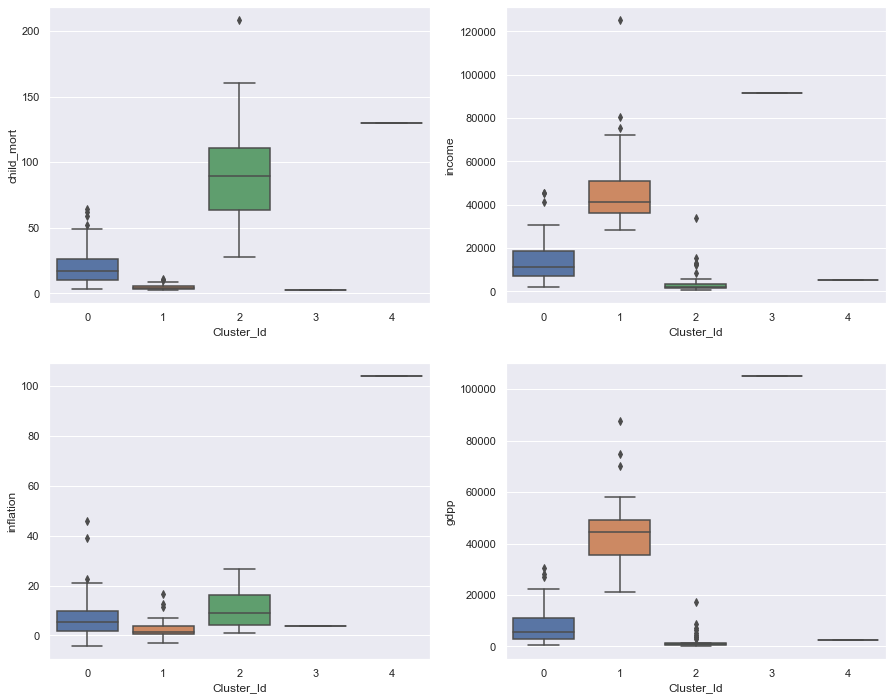

In [63]:
# Box plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id', y = 'child_mort', data = df_merge_col,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'income', data = df_merge_col,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'inflation', data=df_merge_col,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'gdpp', data=df_merge_col,ax=axes[1][1])

#### Inference:
- Child Mortality is highest for Cluster `2`  and Cluster `4`.These clusters need some aid.
- Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development.
  Income per capita and gdpp seems lowest for countries in clusters `2` and `4`. Hence, these countries need some help.

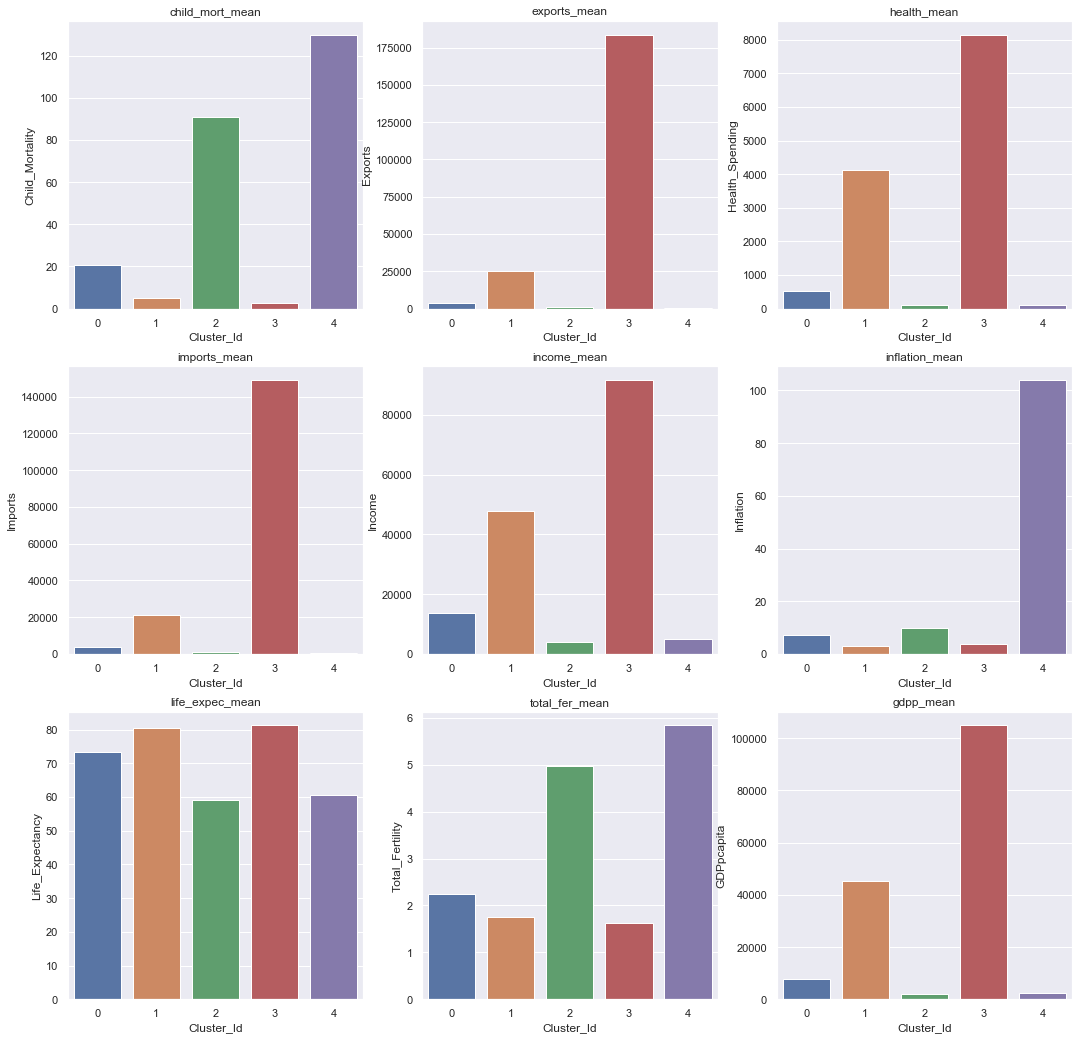

In [64]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(df_concat.Cluster_Id, df_concat.Child_Mortality)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(df_concat.Cluster_Id, df_concat.Exports)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(df_concat.Cluster_Id, df_concat.Health_Spending)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(df_concat.Cluster_Id, df_concat.Imports)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(df_concat.Cluster_Id, df_concat.Income)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(df_concat.Cluster_Id, df_concat.Inflation)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(df_concat.Cluster_Id, df_concat.Life_Expectancy)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(df_concat.Cluster_Id, df_concat.Total_Fertility)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(df_concat.Cluster_Id, df_concat.GDPpcapita)
plt.show()

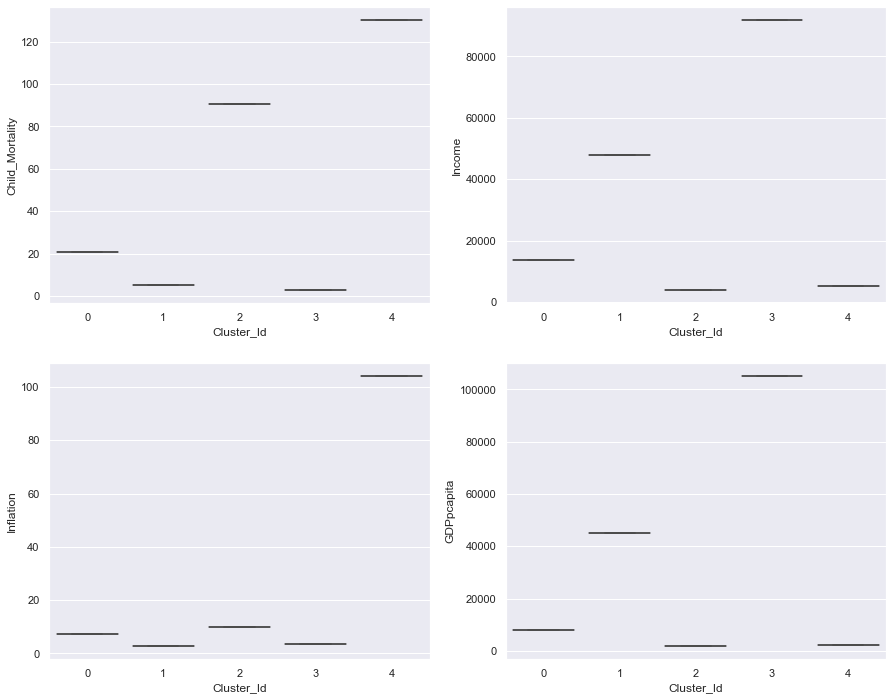

In [65]:
# Box plot to visualise the mean value of few original attributes.

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'Cluster_Id', y = 'Child_Mortality', data = df_concat,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'Income', data = df_concat,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'Inflation', data=df_concat,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'GDPpcapita', data=df_concat,ax=axes[1][1])

#### Inference:
The mean values suggests the same story as above

In [66]:
# List of countries in Cluster 2

df_merge_col[df_merge_col['Cluster_Id']==2]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,2
3,Angola,119.0000,2199.1900,1514.3700,100.6050,5900,22.4000,60.1000,6.1600,3530,2
17,Benin,111.0000,180.4040,281.9760,31.0780,1820,0.8850,61.8000,5.3600,758,2
21,Botswana,52.5000,2768.6000,3257.5500,527.0500,13300,8.9200,57.1000,2.8800,6350,2
25,Burkina Faso,116.0000,110.4000,170.2000,38.7550,1430,6.8100,57.9000,5.8700,575,2
26,Burundi,93.6000,20.6052,90.5520,26.7960,764,12.3000,57.7000,6.2600,231,2
28,Cameroon,108.0000,290.8200,353.7000,67.2030,2660,1.9100,57.3000,5.1100,1310,2
31,Central African Republic,149.0000,52.6280,118.1900,17.7508,888,2.0100,47.5000,5.2100,446,2
32,Chad,150.0000,330.0960,390.1950,40.6341,1930,6.3900,56.5000,6.5900,897,2
36,Comoros,88.2000,126.8850,397.5730,34.6819,1410,3.8700,65.9000,4.7500,769,2


In [67]:
# List of countries in Cluster 4

df_merge_col[df_merge_col['Cluster_Id']==4]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
113,Nigeria,130.0000,589.4900,405.4200,118.1310,5150,104.0000,60.5000,5.8400,2330,4


Now lets apply Hierarchial Clustering to see if we get any better clusters or not.

### Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

- Divisive
- Agglomerative.

In [68]:
df_pca_final_data.head()

,PC_1,PC_2,PC_3
0,-2.6374,1.4690,-0.5414
1,-0.0223,-1.4319,-0.0207
2,-0.4576,-0.6733,0.9619
3,-2.7245,2.1746,0.6067
4,0.6498,-1.0244,-0.2501


**Single Linkage:<br>**

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.


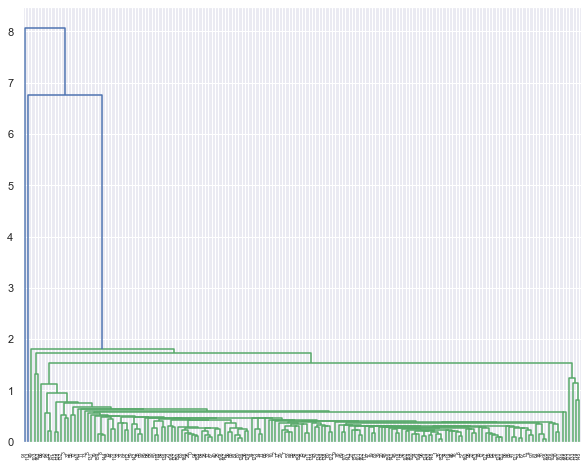

In [69]:
# Single linkage

mergings = linkage(df_pca_final_data, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

**Complete Linkage<br>**

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points. 


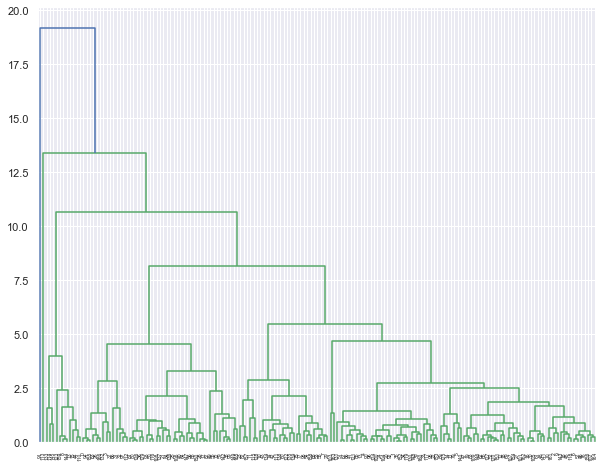

In [70]:
# Complete Linkage

mergings = linkage(df_pca_final_data, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [71]:
df_pca_hc = df_pca_final.copy()
df_pca_hc = df_pca_hc.drop('Cluster_Id',axis=1)
df_pca_hc.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.6374,1.4690,-0.5414
1,Albania,-0.0223,-1.4319,-0.0207
2,Algeria,-0.4576,-0.6733,0.9619
3,Angola,-2.7245,2.1746,0.6067
4,Antigua and Barbuda,0.6498,-1.0244,-0.2501


In [72]:
# Let cut the tree at height of approx 3 to get 5 clusters and see if it get any better cluster formation.

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_hc = pd.concat([df_pca_hc, clusterCut], axis=1)
df_hc.columns = ['country', 'PC_1', 'PC_2','PC_3','Cluster_Id']

In [73]:
df_hc.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.6374,1.4690,-0.5414,0
1,Albania,-0.0223,-1.4319,-0.0207,1
2,Algeria,-0.4576,-0.6733,0.9619,1
3,Angola,-2.7245,2.1746,0.6067,0
4,Antigua and Barbuda,0.6498,-1.0244,-0.2501,1


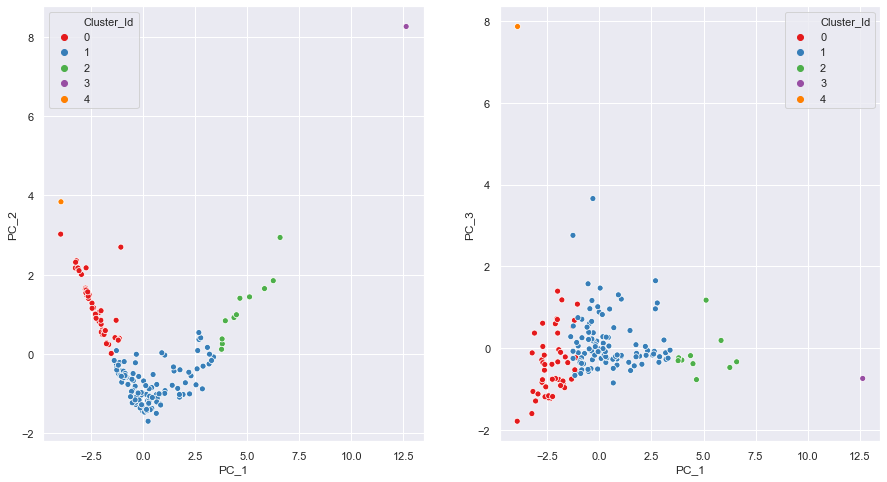

In [74]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,8))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[1])

#### Inference:
Cluster `4` seems to be not properly formed in Plot 1.

In [75]:
# Merging the df with PCA with original df

df_merge_hc = pd.merge(df_country,df_hc,on='country')
df_merge_col_hc = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]

In [76]:
df_merge_col_hc.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,2
1,Albania,16.6000,1145.2000,1987.7400,267.8950,9930,4.4900,76.3000,1.6500,4090,0
2,Algeria,27.3000,1712.6400,1400.4400,185.9820,12900,16.1000,76.5000,2.8900,4460,0
3,Angola,119.0000,2199.1900,1514.3700,100.6050,5900,22.4000,60.1000,6.1600,3530,2
4,Antigua and Barbuda,10.3000,5551.0000,7185.8000,735.6600,19100,1.4400,76.8000,2.1300,12200,0


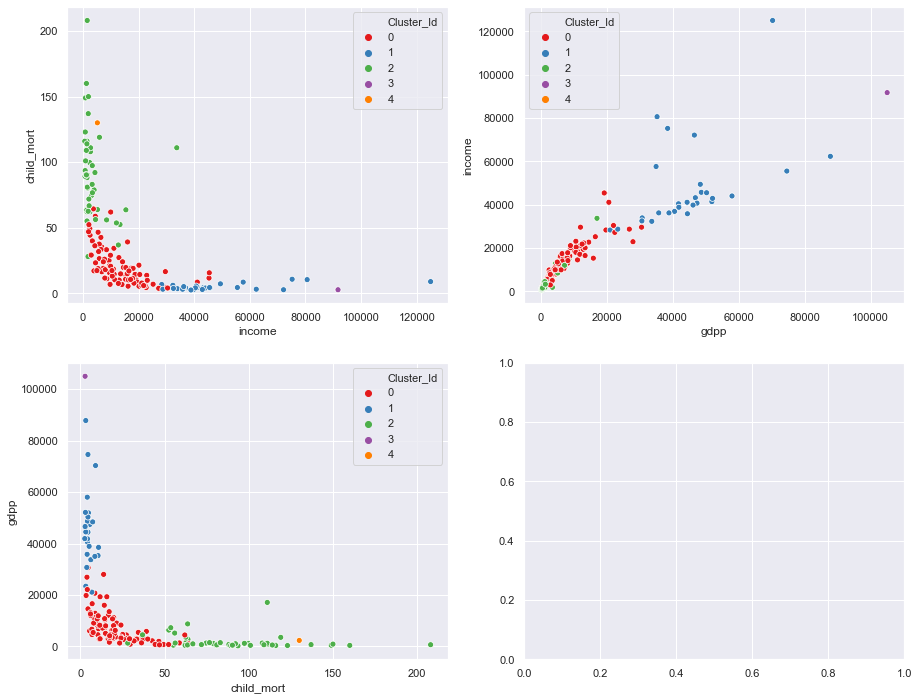

In [77]:
# Scatter plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col_hc,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col_hc,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col_hc,legend='full',palette="Set1",ax=axes[1][0])

In [78]:
child_mort_mean_hc = 	pd.DataFrame(df_merge_col_hc.groupby(["Cluster_Id"]).child_mort.mean())
exports_mean_hc= 	pd.DataFrame(df_merge_col_hc.groupby(["Cluster_Id"]).exports.mean())
health_mean_hc = 	pd.DataFrame(df_merge_col_hc.groupby(["Cluster_Id"]).health.mean())
imports_mean_hc = 	pd.DataFrame(df_merge_col_hc.groupby(["Cluster_Id"]).imports.mean())
income_mean_hc = 	pd.DataFrame(df_merge_col_hc.groupby(["Cluster_Id"]).income.mean())
inflat_mean_hc = 	pd.DataFrame(df_merge_col_hc.groupby(["Cluster_Id"]).inflation.mean())
life_expec_mean_hc = 	pd.DataFrame(df_merge_col_hc.groupby(["Cluster_Id"]).life_expec.mean())
total_fer_mean_hc = 	pd.DataFrame(df_merge_col_hc.groupby(["Cluster_Id"]).total_fer.mean())
gdpp_mean_hc = 	pd.DataFrame(df_merge_col_hc.groupby(["Cluster_Id"]).gdpp.mean())

In [79]:

country_analysis_df_hc= pd.concat([pd.Series([0,1,2,3,4]),child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflat_mean_hc,life_expec_mean_hc,
                                 total_fer_mean_hc,gdpp_mean_hc], axis=1)

In [80]:

country_analysis_df_hc.columns = ["ClusterID","child_mort_mean_hc","exports_mean_hc","health_mean_hc","imports_mean_hc","income_mean_hc","inflation_mean_hc","life_expec_mean_hc","total_fer_mean_hc","gdpp_mean_hc"]
country_analysis_df_hc

,ClusterID,child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflation_mean_hc,life_expec_mean_hc,total_fer_mean_hc,gdpp_mean_hc
0,0,20.5478,3477.0155,528.8943,3588.1336,13804.3333,7.1601,73.3933,2.2424,7808.5778
1,1,5.0607,25013.1036,4114.4289,21018.7643,47928.5714,2.8501,80.4500,1.7586,45200.0000
2,2,90.7936,885.2247,114.7514,835.9992,3870.7021,9.9518,59.2128,4.9740,1900.2553
3,3,2.8000,183750.0000,8158.5000,149100.0000,91700.0000,3.6200,81.3000,1.6300,105000.0000
4,4,130.0000,589.4900,118.1310,405.4200,5150.0000,104.0000,60.5000,5.8400,2330.0000


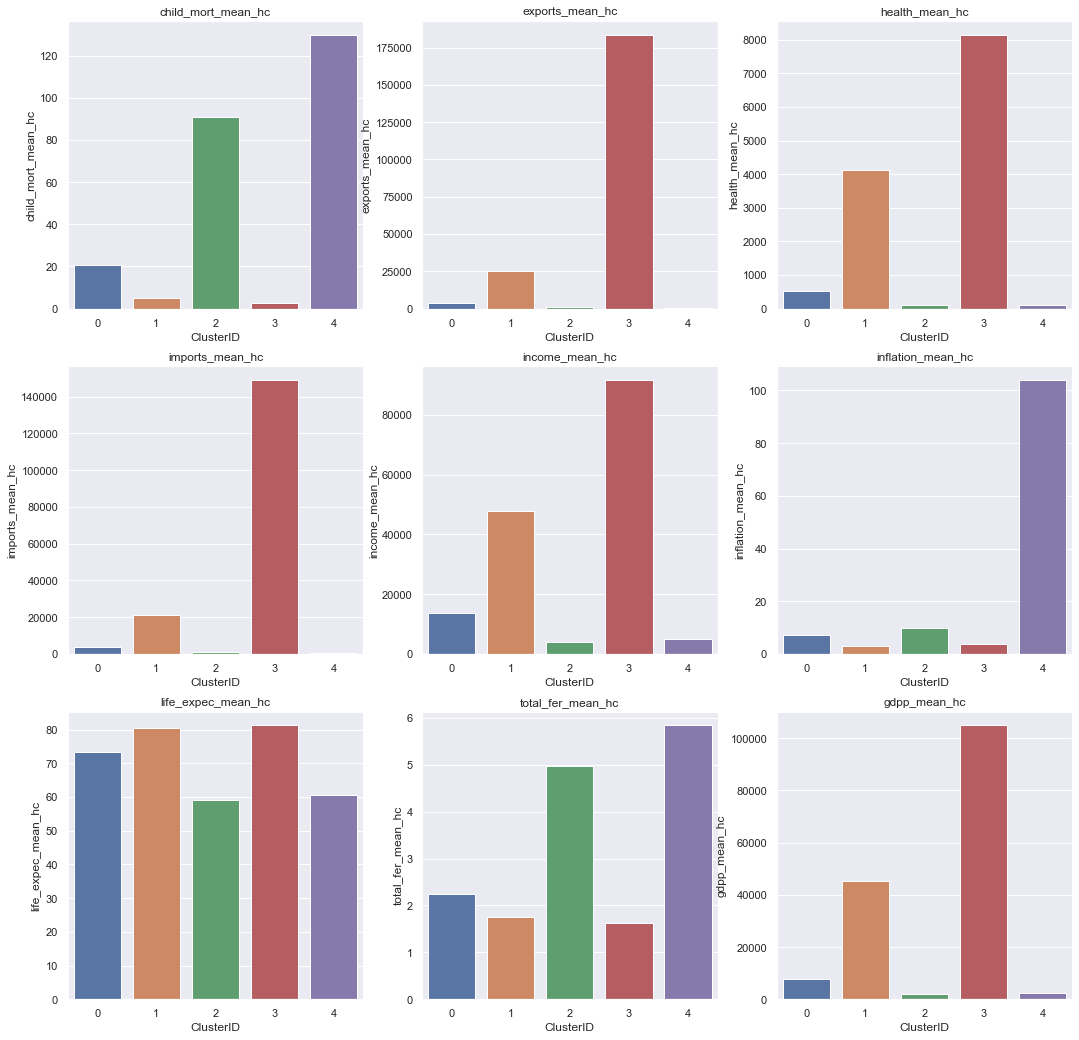

In [81]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.child_mort_mean_hc)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.exports_mean_hc)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.health_mean_hc)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.imports_mean_hc)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.income_mean_hc)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.inflation_mean_hc)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.life_expec_mean_hc)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.total_fer_mean_hc)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.gdpp_mean_hc)

plt.show()

**We have analyzed both K-means and Hierarchial clustering and found clusters formed are quite identical.**

<a id="8"></a> <br>
## Step 8 : Final Analysis using Hierarchical Clustering

We got Cluster `2` and Cluster `4` which are in need of aid.

In [82]:
df_clus2 = df_merge_col_hc[df_merge_col_hc['Cluster_Id'] ==2]

In [83]:
df_clus4 = df_merge_col_hc[df_merge_col_hc['Cluster_Id'] ==4]

In [84]:
# List of countries which need help

df_append= df_clus2.append(df_clus4)

In [85]:
df_append.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,2
3,Angola,119.0000,2199.1900,1514.3700,100.6050,5900,22.4000,60.1000,6.1600,3530,2
17,Benin,111.0000,180.4040,281.9760,31.0780,1820,0.8850,61.8000,5.3600,758,2
21,Botswana,52.5000,2768.6000,3257.5500,527.0500,13300,8.9200,57.1000,2.8800,6350,2
25,Burkina Faso,116.0000,110.4000,170.2000,38.7550,1430,6.8100,57.9000,5.8700,575,2


In [86]:
df_append.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000
mean,91.6104,879.0635,827.0288,114.8218,3897.3542,11.9111,59.2396,4.9921,1909.2083,2.0417
std,34.3199,2252.4740,1540.9819,165.5183,5590.1686,15.3625,6.3849,1.0362,2925.9110,0.2887
min,28.1000,20.6052,90.5520,12.8212,609.0000,0.8850,32.1000,2.5900,231.0000,2.0000
25%,63.6750,102.8738,193.3195,34.0059,1390.0000,4.0800,56.7250,4.4750,551.5000,2.0000
50%,89.7500,196.2600,339.3060,51.6135,1860.0000,8.8550,59.8000,5.0550,932.0000,2.0000
75%,111.0000,552.5225,801.0000,95.3033,3522.5000,16.6000,62.8250,5.5975,1465.0000,2.0000
max,208.0000,14671.8000,10071.9000,766.0800,33700.0000,104.0000,71.1000,7.4900,17100.0000,4.0000


In [87]:
df_append.shape

(48, 11)

In [88]:
result = pd.DataFrame(df_append.country)
result

,country
0,Afghanistan
3,Angola
17,Benin
21,Botswana
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
36,Comoros


In [89]:
df_append

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2000,55.3000,248.2970,41.9174,1610,9.4400,56.2000,5.8200,553,2
3,Angola,119.0000,2199.1900,1514.3700,100.6050,5900,22.4000,60.1000,6.1600,3530,2
17,Benin,111.0000,180.4040,281.9760,31.0780,1820,0.8850,61.8000,5.3600,758,2
21,Botswana,52.5000,2768.6000,3257.5500,527.0500,13300,8.9200,57.1000,2.8800,6350,2
25,Burkina Faso,116.0000,110.4000,170.2000,38.7550,1430,6.8100,57.9000,5.8700,575,2
26,Burundi,93.6000,20.6052,90.5520,26.7960,764,12.3000,57.7000,6.2600,231,2
28,Cameroon,108.0000,290.8200,353.7000,67.2030,2660,1.9100,57.3000,5.1100,1310,2
31,Central African Republic,149.0000,52.6280,118.1900,17.7508,888,2.0100,47.5000,5.2100,446,2
32,Chad,150.0000,330.0960,390.1950,40.6341,1930,6.3900,56.5000,6.5900,897,2
36,Comoros,88.2000,126.8850,397.5730,34.6819,1410,3.8700,65.9000,4.7500,769,2


#### Final List of countries which are in need of the aid based on socio-economic factors.

In [90]:
df_append['country']

0      Afghanistan             
3      Angola                  
17     Benin                   
21     Botswana                
25     Burkina Faso            
26     Burundi                 
28     Cameroon                
31     Central African Republic
32     Chad                    
36     Comoros                 
37     Congo, Dem. Rep.        
38     Congo, Rep.             
40     Cote d'Ivoire           
49     Equatorial Guinea       
50     Eritrea                 
55     Gabon                   
56     Gambia                  
59     Ghana                   
63     Guinea                  
64     Guinea-Bissau           
66     Haiti                   
72     Iraq                    
80     Kenya                   
81     Kiribati                
84     Lao                     
87     Lesotho                 
88     Liberia                 
93     Madagascar              
94     Malawi                  
97     Mali                    
99     Mauritania              
106    M

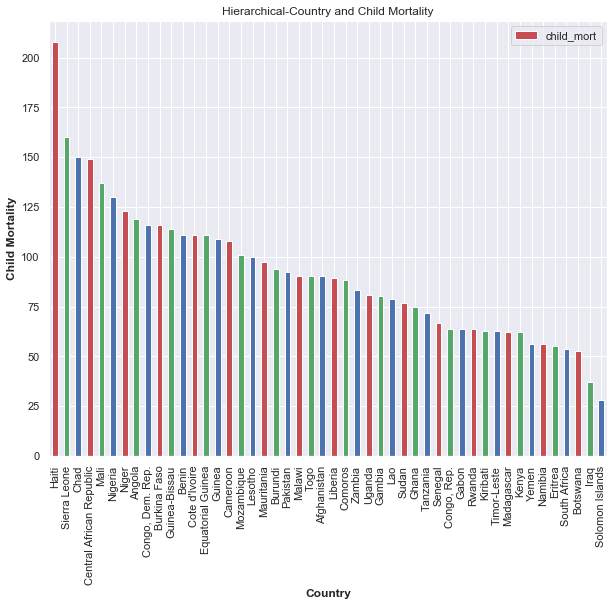

In [91]:
# BarPlot for Child Mortality of countries which are in need of aid

df_list_cm = pd.DataFrame(df_append.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
df_list_cm.plot.bar(color="rgb")
plt.title('Hierarchical-Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

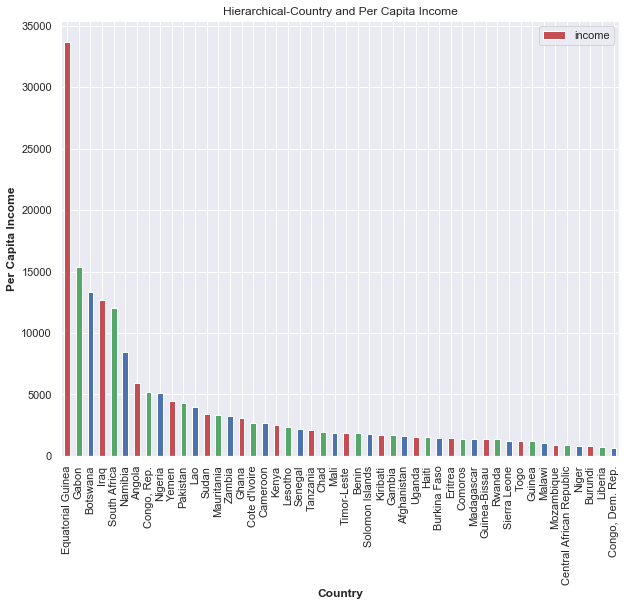

In [92]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(df_append.groupby(['country'])['income'].mean().sort_values(ascending = False))
df_list_in.plot.bar(color="rgb")
plt.title('Hierarchical-Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

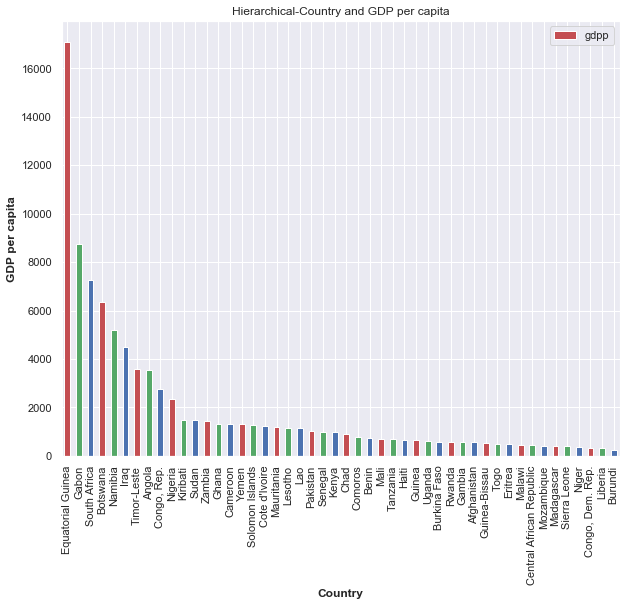

In [93]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_gdp = pd.DataFrame(df_append.groupby(['country'])['gdpp'].mean().sort_values(ascending = False))
df_list_gdp.plot.bar(color="rgb")
plt.title('Hierarchical-Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

<a id="9"></a> <br>
## Step 9 : Final Analysis using K-Means Clustering


In [94]:
df_clus2_k = df_merge_col[df_merge_col['Cluster_Id'] ==2]

In [95]:
df_clus4_k = df_merge_col[df_merge_col['Cluster_Id'] ==4]

In [96]:
df_append_k= df_clus2_k.append(df_clus4_k)

<b>Final List of countries which are in need of the aid based on socio-economic factors.</b>

In [97]:
df_append_k['country']

0      Afghanistan             
3      Angola                  
17     Benin                   
21     Botswana                
25     Burkina Faso            
26     Burundi                 
28     Cameroon                
31     Central African Republic
32     Chad                    
36     Comoros                 
37     Congo, Dem. Rep.        
38     Congo, Rep.             
40     Cote d'Ivoire           
49     Equatorial Guinea       
50     Eritrea                 
55     Gabon                   
56     Gambia                  
59     Ghana                   
63     Guinea                  
64     Guinea-Bissau           
66     Haiti                   
72     Iraq                    
80     Kenya                   
81     Kiribati                
84     Lao                     
87     Lesotho                 
88     Liberia                 
93     Madagascar              
94     Malawi                  
97     Mali                    
99     Mauritania              
106    M

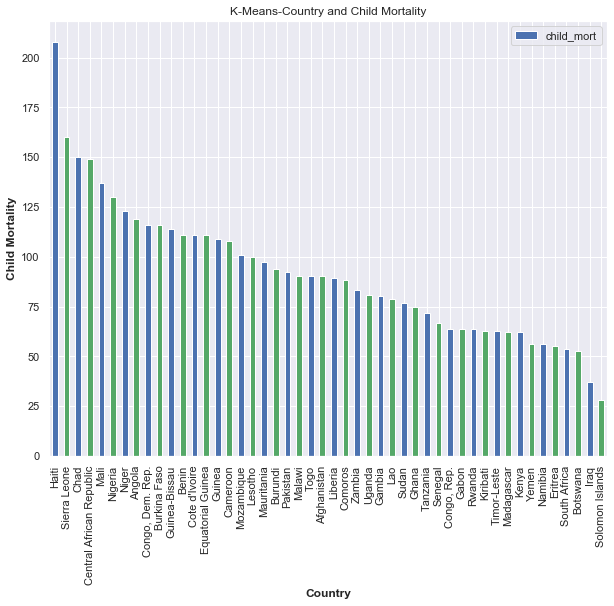

In [98]:

df_list_cm = pd.DataFrame(df_append_k.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
df_list_cm.plot.bar(color="bg")
plt.title('K-Means-Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

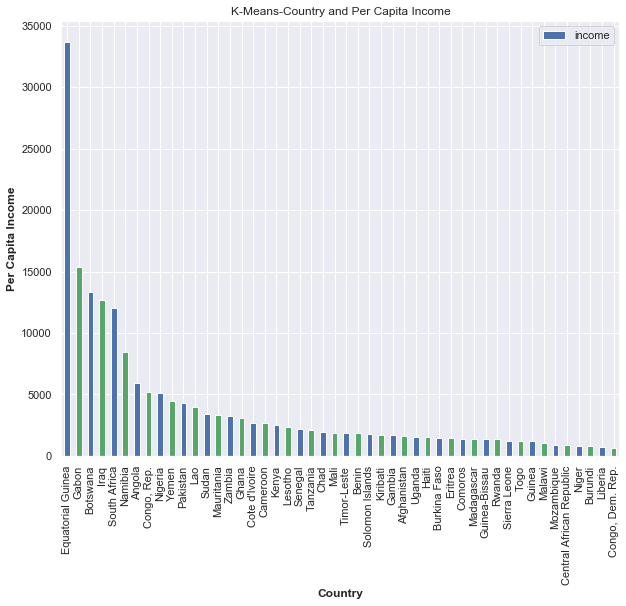

In [99]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(df_append_k.groupby(['country'])['income'].mean().sort_values(ascending = False))
df_list_in.plot.bar(color="bg")
plt.title('K-Means-Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

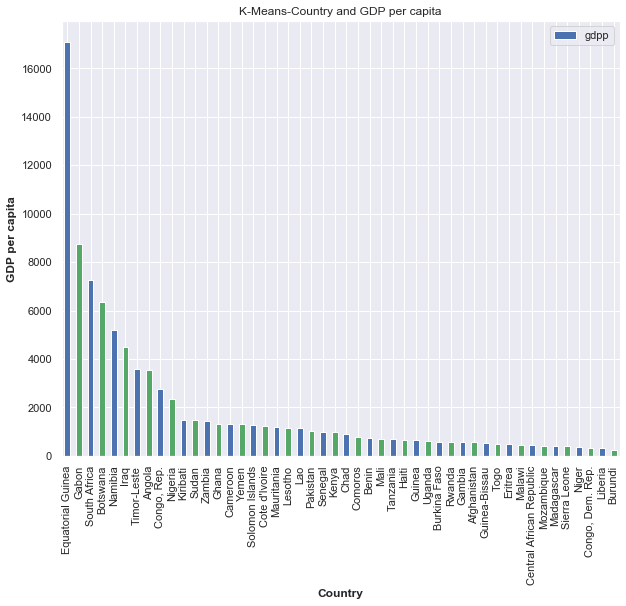

In [100]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_gdp = pd.DataFrame(df_append_k.groupby(['country'])['gdpp'].mean().sort_values(ascending = False))
df_list_gdp.plot.bar(color="bg")
plt.title('K-Means-Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

<a id="10"></a> <br>
## Step 10 : Closing Statement

- PCA was used above to reduce the variables involved and then clustering was done of countries based on those Principal components
- Later it was identified that few factors like `child mortality`, `income` etc  plays a vital role in deciding the development status of the country and we built clusters of countries based on that.
- Based on those clusters it was identified that the below list of countries are in dire need of aid.
- The list of countries are subject to change as it is based on the few factors like `Number of components chosen`, `Number of Clusters chosen`, `Clustering method used` etc.which we have used to build the model. 

In [101]:
# Final countries list
df_append.reset_index(drop=True).country

0     Afghanistan             
1     Angola                  
2     Benin                   
3     Botswana                
4     Burkina Faso            
5     Burundi                 
6     Cameroon                
7     Central African Republic
8     Chad                    
9     Comoros                 
10    Congo, Dem. Rep.        
11    Congo, Rep.             
12    Cote d'Ivoire           
13    Equatorial Guinea       
14    Eritrea                 
15    Gabon                   
16    Gambia                  
17    Ghana                   
18    Guinea                  
19    Guinea-Bissau           
20    Haiti                   
21    Iraq                    
22    Kenya                   
23    Kiribati                
24    Lao                     
25    Lesotho                 
26    Liberia                 
27    Madagascar              
28    Malawi                  
29    Mali                    
30    Mauritania              
31    Mozambique              
32    Na

The countries that require most help:

Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Pakistan, Rwanda, Senegal, Sierra Leone, Solomon Islands, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia, Nigeria
